##**https://www.kaggle.com/datasets/uciml/mushroom-classification**


##**Library**


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel


import warnings
warnings.filterwarnings('ignore')

##**Analysis Data**

In [ ]:
Project = pd.read_csv('mushrooms.csv')
print("Project data contain {} rows and {} columns \n".format(Project.shape[0], Project.shape[1]))
print(Project.info(), '\n')
Project.head()

Project data contain 8124 rows and 23 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
Project['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object

In [ ]:
Project['stalk-root'].value_counts(normalize=True)

b    0.464796
?    0.305268
e    0.137863
c    0.068439
r    0.023634
Name: stalk-root, dtype: float64

In [ ]:
#Mengganti data missing(?) dengan data modus
Project['stalk-root'].replace(['?'], 'b')

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

In [ ]:
Project.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##**Visualization**

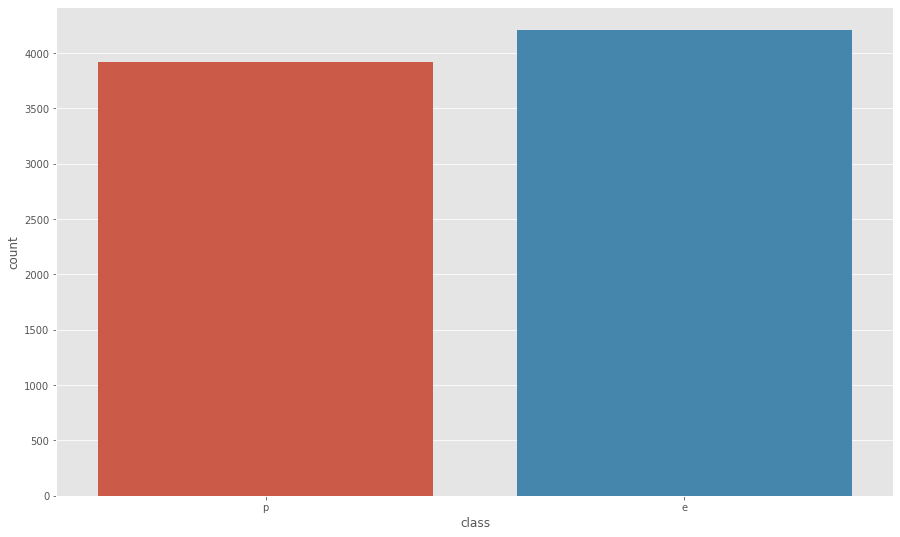

In [ ]:
# Melihat Data Perbandingan Jamur yang beracun (P) dengan yang bisa dimakan (e)
sns.countplot(Project['class'])

<Figure size 720x360 with 0 Axes>

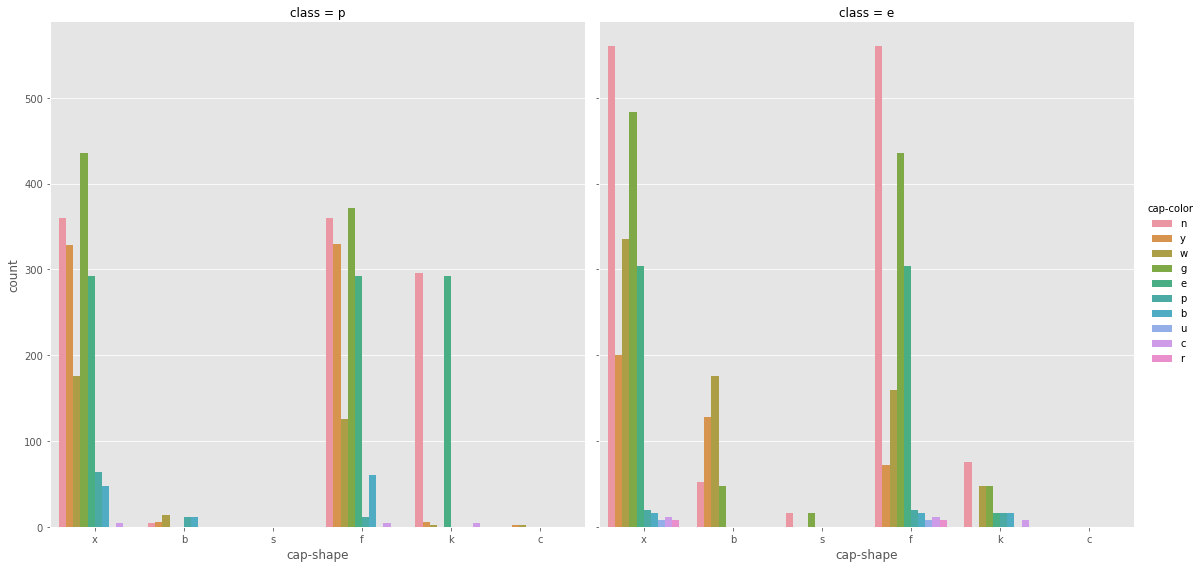

In [ ]:
# Kesimpulan Perbandingan Untuk  Jamur yang terbaik yang bisa dimakan dan Jamur yang paling beracun
# Jamur dengan warna Putih dan bentuk lonceng rekomendasi terbaik untuk dimakan
# jamur dengan warna merah dan bentuk kenop jenis yang paling beracun

plt.figure(figsize=(10,5))
sns.catplot(data=Project, 
            x="cap-shape", hue="cap-color", 
            col='class', 
            kind='count', height=8)

<Figure size 720x360 with 0 Axes>

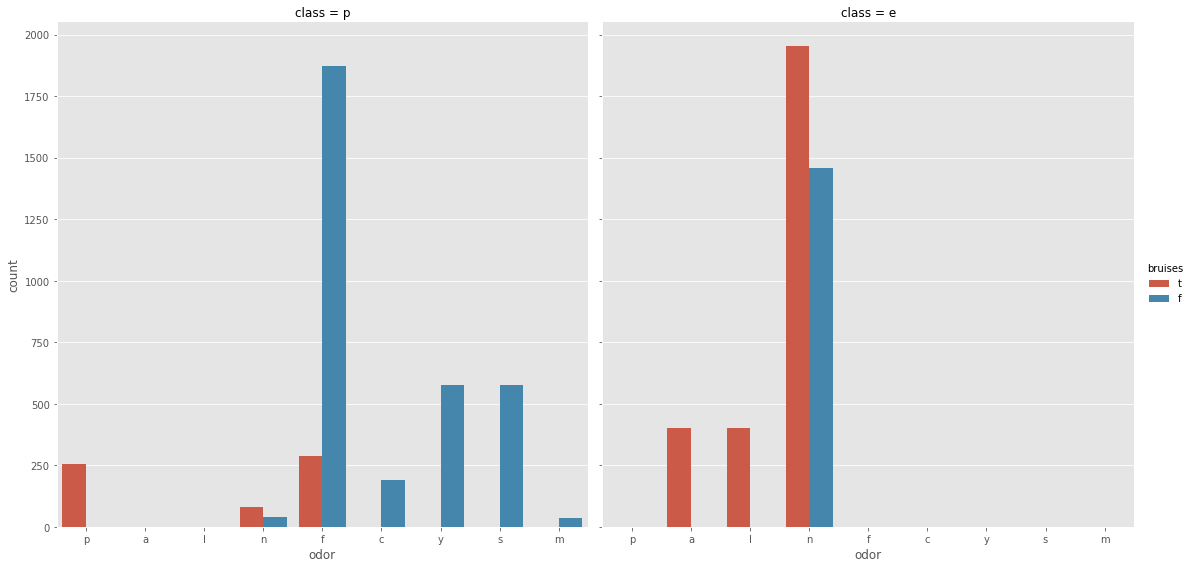

In [ ]:
# Kesimpulan Perbandingan Untuk jamur yang dapat dimakan dan jamur yang beracun dari bau
# Jamur yang tidak berbau (n) dan memar rekomendasi terbaik untuk dimakan
# Jamur yang berbau busuk (f) dan tidak ada memar jenis jamur yang beracun

plt.figure(figsize=(10,5))
sns.catplot(data=Project, 
            x="odor", hue="bruises", 
            col='class', 
            kind='count', height=8)

<Figure size 720x360 with 0 Axes>

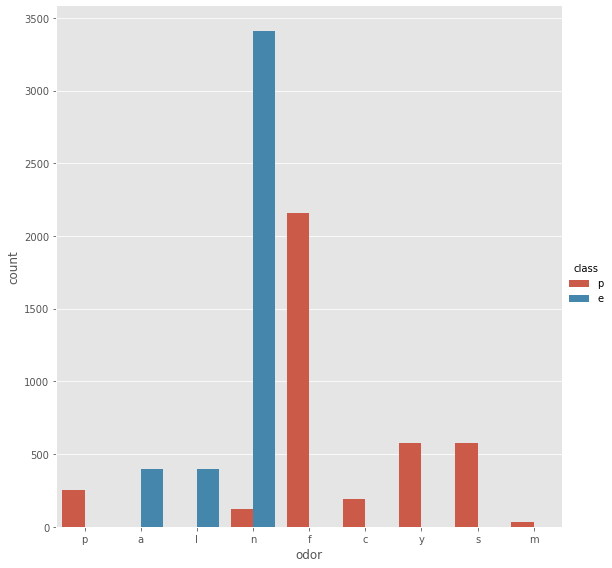

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(data=Project, 
            x="odor", hue="class",  
            kind='count', height=8)

<Figure size 720x360 with 0 Axes>

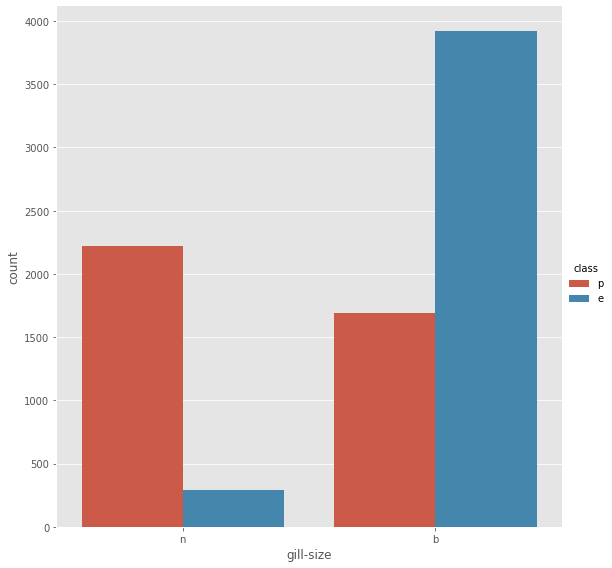

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(data=Project, 
            x="gill-size", hue="class",  
            kind='count', height=8)

<Figure size 720x360 with 0 Axes>

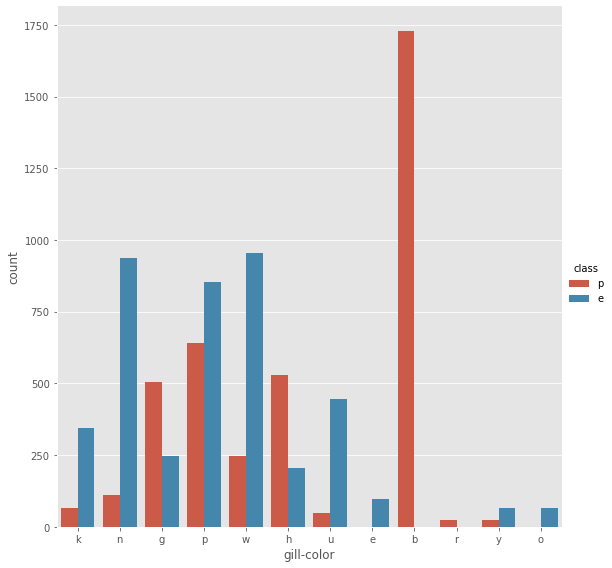

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(data=Project, 
            x="gill-color", hue="class",  
            kind='count', height=8)

<Figure size 720x360 with 0 Axes>

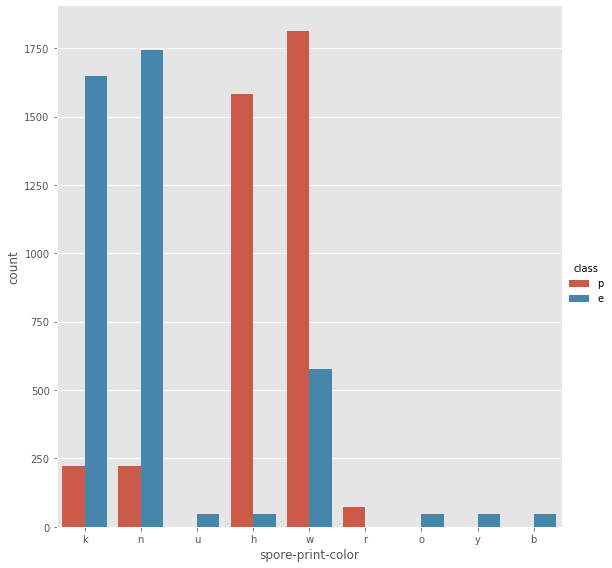

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(data=Project, 
            x="spore-print-color", hue="class",  
            kind='count', height=8)

<Figure size 720x360 with 0 Axes>

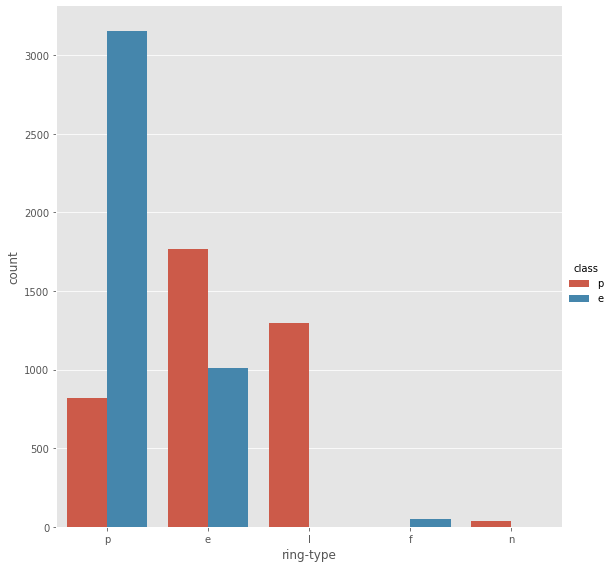

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(data=Project, 
            x="ring-type", hue="class",  
            kind='count', height=8)

## **Data processing**

## Label Encoder

In [ ]:
Project.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
PL = LabelEncoder()
df= Project.apply(LabelEncoder().fit_transform)
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [ ]:
mappings = list()

PL = LabelEncoder()
for columns in range (len(Project.columns)):
  Project[Project.columns[columns]] = PL.fit_transform(Project[Project.columns[columns]])
  mappings_dict = {index :label for index, label in enumerate(PL.classes_)}
  mappings.append (mappings_dict)

In [ ]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

## Train and Test Split

In [ ]:
x = df.drop(['class'], axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3 , random_state=0)

## Uji Model Before HPT

In [ ]:
dt = DecisionTreeClassifier ( max_depth=3, random_state=0)
dt.fit (x_train, y_train)

rm = RandomForestClassifier (max_depth=3, random_state=0)
rm.fit (x_train, y_train)

lr = LogisticRegression()
lr.fit (x_train, y_train)



LogisticRegression()

In [ ]:
y_pred1 = dt.predict(x_test)
y_pred2 = rm.predict(x_test)
y_pred3 = lr.predict(x_test)

In [ ]:
print('ACC dt', accuracy_score(y_test, y_pred1))
print('ACC rm', accuracy_score(y_test, y_pred2))
print('ACC lr', accuracy_score(y_test, y_pred3))

ACC dt 0.9614438063986874
ACC rm 0.977850697292863
ACC lr 0.9491386382280558


In [ ]:
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))
print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1272
           1       0.95      0.97      0.96      1166

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1272
           1       1.00      0.96      0.98      1166

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1272
           1       0.96      0.94      0.95      1166

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [ ]:
pd.DataFrame( {'Models' : ['DT' , 'RM', 'LR'], 
               'ACC' : [accuracy_score(y_test, y_pred1),
                       accuracy_score(y_test, y_pred2),
                       accuracy_score(y_test, y_pred3)]})

,Models,ACC
0,DT,0.961444
1,RM,0.977851
2,LR,0.949139


##Hyper Parameter Tuning Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 2, 3, 4, 5]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the param grid
param_grid = {'n_estimators': n_estimators, 
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [1], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV (estimator = rf_Model,param_grid = param_grid , cv = 3, verbose=2, n_jobs = 4)

rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10], 'n_estimators': [1]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1}

In [ ]:
rm = RandomForestClassifier (bootstrap=True, random_state =0, max_depth = 5 , max_features='auto', )
rm.fit (x_train, y_train)
y_pred2 = rm.predict(x_test)

print('ACC rm', accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))


ACC rm 0.9913863822805579
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1272
           1       1.00      0.98      0.99      1166

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



## **The Best Feature Score** 

In [ ]:
feature_scores = pd.Series(rm .feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

odor                        0.159613
gill-size                   0.134524
spore-print-color           0.092120
ring-type                   0.075425
gill-color                  0.074772
bruises                     0.067615
population                  0.066665
gill-spacing                0.059266
stalk-surface-below-ring    0.055199
stalk-surface-above-ring    0.052854
stalk-root                  0.050010
habitat                     0.029133
stalk-shape                 0.017040
stalk-color-above-ring      0.016785
stalk-color-below-ring      0.015274
cap-color                   0.009366
ring-number                 0.008752
cap-surface                 0.007044
veil-color                  0.005989
cap-shape                   0.001760
gill-attachment             0.000794
veil-type                   0.000000
dtype: float64

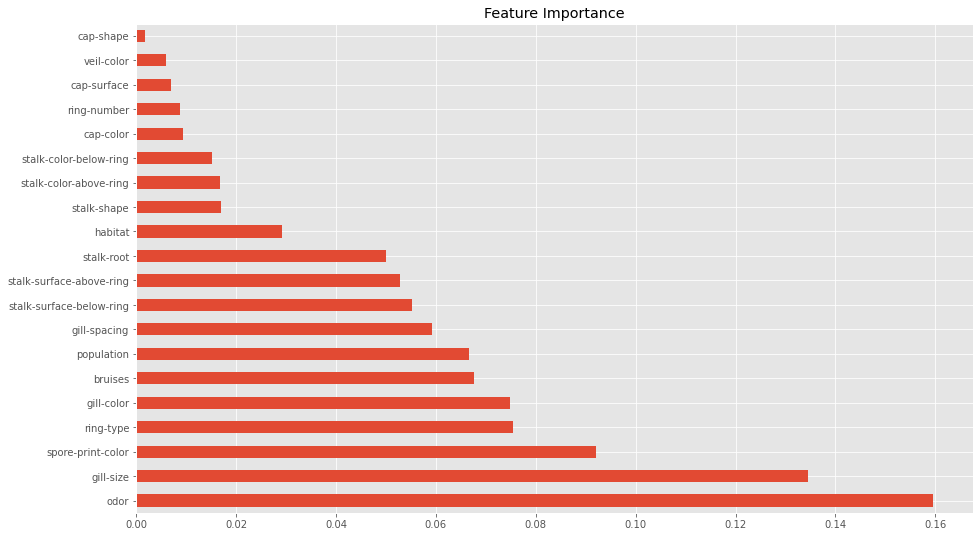

In [ ]:
rm.feature_importances_
model = SelectFromModel(rm, prefit=True)
test = model.transform(x_test)

plt.rc('figure', figsize=[15,9])
plt.style.use('ggplot')

feat_importances = pd.Series(rm.feature_importances_, index=x_test.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

##**Save Model**

In [145]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=22)
pca_fit = pca1.fit_transform(x)

In [146]:
pca1.explained_variance_ratio_

array([3.37587333e-01, 1.65810984e-01, 1.22858213e-01, 6.79661067e-02,
       5.83117349e-02, 5.09253861e-02, 4.67084060e-02, 3.90841562e-02,
       3.57787686e-02, 2.59161299e-02, 1.99543354e-02, 1.02953397e-02,
       5.54492043e-03, 4.24171932e-03, 3.45031536e-03, 2.04039590e-03,
       1.51233674e-03, 1.24477475e-03, 4.89804172e-04, 2.24486721e-04,
       5.43532716e-05, 3.31705335e-36])

In [147]:
rm.fit(pca_fit,y)

RandomForestClassifier(max_depth=5, random_state=0)

In [148]:
import joblib

In [149]:
joblib.dump(rm,"Mushroom_prediction")

['Mushroom_prediction']

In [150]:
model = joblib.load('Mushroom_prediction')

In [151]:
p = model.predict(pca1.transform([[5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5]]))
p

array([1])

In [152]:
if p == 1 :
  print ('Poissonous')
else :
  print ('edible')

Poissonous


In [ ]:
#p = model.predict(pca1.transform([[5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5]]))

In [ ]:
#p = model.predict(pca1.transform([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))